<a href="https://colab.research.google.com/github/Hoyadeath/practice_AI/blob/main/2_05_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터 생성
2. 데이터 표준화
3. 데이터를 훈련 세트와 테스트 세트로 나눔
4. 선형 SVM 분류기를 생성하고 훈련 세트에 학습
5. 훈련된 모델과 데이터 포인트를 포함하여 결정 경계를 시각화

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터셋을 생성합니다.
# make_classification 함수는 분류를 위한 랜덤한 테스트 데이터를 생성합니다.
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                                    random_state=1, n_clusters_per_class=1)
# n_features: 각 샘플의 특성(feature)수   2: 2차원 데이터 생성(변수 2개)
# n_redundant: 불필요한 특성의 수, 0 : 모든 특성 사용
# n_informative: 목표 변수를 예측하는 데 사용할 특성 수,  2 : 모든 특성 사용
# n_clusters_per_class: 각 클래스에 대해 생성할 클러스터의 수
    # 1 :각 클래스당 하나의 클러스터를 생성하도록 설정했습니다
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
# 데이터를 표준 (평균 0, 분산 1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.1, random_state=1)

In [ ]:
# SVM 분류기를 생성하고 학습합니다.
svm = SVC(kernel='linear', C=1.0, random_state=1) # C: 오류 허용 정도
 # kernel: 사용할 커널 종류 지정. 'linear' 선형 커널(데이터가 선형적으로 분리 가능 한 경우 사용)
    # 'poly' (다항식 커널), 'rbf' (방사형 기저 함수), 'sigmoid' 등

# 데이터셋이 작고, 노이즈가 많지 않은 경우: C 값을 크게 설정(예: 10, 100, 1000)
    # c값이 높으면 모델은 학습 데이터에 대한 오류를 덜 허용
# 데이터셋이 크거나, 노이즈가 많은 경우: C 값을 작게 설정, 더 강한 규제 적용(예: 0.01, 0.1, 1)
    # C 값이 낮으면 모델은 오류를 더 많이 허용 <-- 오버피팅 방지
svm.fit(X_train, y_train)



SVC(kernel='linear', random_state=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 테스트 세트에서 예측을 수행합니다.
y_pred = svm.predict(X_test)

# 정확도를 계산하고 출력합니다.
print("Accuracy:", accuracy_score(y_test, y_pred))

# 혼동 행렬을 계산하고 출력합니다.
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 분류 보고서를 출력합니다.
# 이 보고서에는 정밀도, 재현율, F1 점수가 포함됩니다.
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[6 0]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



confusion matrtix <br><br>
6 : 진짜 양성(True Positive, TP)의 수<br>
  실제 양성 클래스인 데이터를 모델이 정확히 양성으로 예측한 수<br>
0 : 거짓 음성(False Negative, FN)의 수<br>
 모델이 양성 클래스인 데이터를 잘못하여 음성으로 예측한 수 <-- 없음<br>
0 (두 번째 행, 첫 번째 열): 거짓 양성(False Positive, FP) 수<br>
 모델이 음성 클래스인 데이터를 잘못하여 양성으로 예측한 수 <-- 없음<br>
4 : 진짜 음성(True Negative, TN)의 수. <br>
 실제 음성 클래스인 데이터를 모델이 정확히 음성으로 예측한 수.<br>

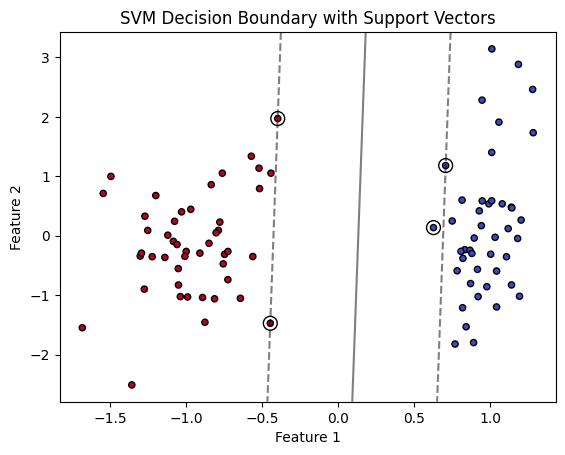

In [ ]:
# 데이터와 결정 경계를 시각화합니다.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# 결정 경계 그리기
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# 결정 경계와 마진을 그립니다.
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# 서포트 벡터를 그립니다.
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Support Vectors')
plt.show()